## Connecting GDrive

In [ ]:
PROJECT_FOLDER = '/content/drive/MyDrive/ColabNotebooks/!_python4data/regression'

def connect_gdrive(PROJECT_FOLDER):
    from google.colab import drive
    import os

    drive.mount('/content/drive')
    os.chdir(PROJECT_FOLDER)
    print('Now current folder is: ', os.getcwd())

connect_gdrive(PROJECT_FOLDER)

Mounted at /content/drive
Now current folder is:  /content/drive/MyDrive/ColabNotebooks/python4data/regression


## Importing libs and data

In [ ]:
from statsmodels.formula.api import ols, logit
from statsmodels.api import qqplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

plot_styles_list = [
    'seaborn',
    'fivethirtyeight',
    'seaborn-pastel',
    'seaborn-whitegrid',
    'ggplot',
    'grayscale'
    'bmh',
]

In [ ]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


## Basic model OLS creation

In [ ]:
# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## Histograms of distribution for categorical variable

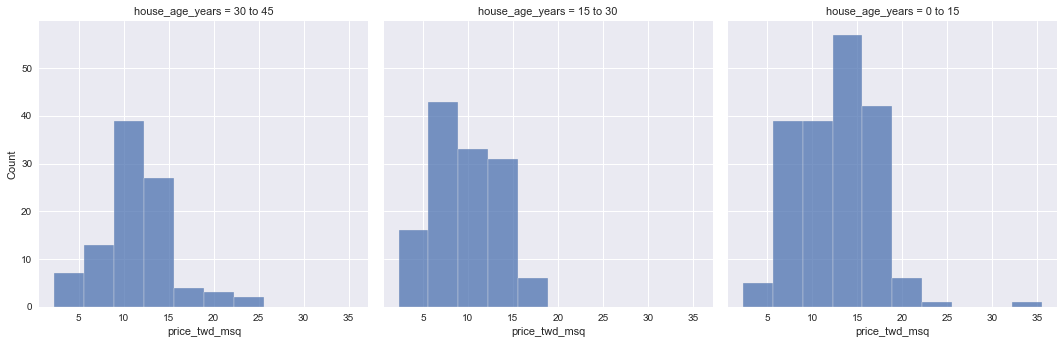

In [ ]:
sns.displot(data=taiwan_real_estate,
        #  x='n_convenience',
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()

In [ ]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()
# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


## Create model OLS with categorical variables and getting params

In [ ]:
mdl_price_vs_age = ols(
    
    # formula in R style
    'price_twd_msq ~ house_age_years', 
    
    # data
    data=taiwan_real_estate).fit()

mdl_price_vs_age.params

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64

## Model w/o intercept

In [ ]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()
mdl_price_vs_age0.params

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64

In [ ]:
# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Print it
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


## Predict

In [ ]:
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


## Combine plots one on another

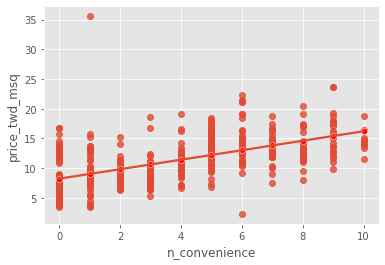

In [ ]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(
    x='n_convenience',
    y='price_twd_msq',
    color='red',
    data=prediction_data
)

# Show the layered plot
plt.show()

In [ ]:
# another example

# fig = plt.figure()

# sns.scatterplot(x="father_height_cm",
#                  y="son_height_cm",
#                  data=father_son)
# plt.axline(xy1=(150, 150),
#            slope=1,
#             linewidth=2,
#             color="green")

# plt.axis("equal")
# plt.show()

In [ ]:
# fig = plt.figure()
# sns.regplot(x="father_height_cm",
#             y="son_height_cm",
#             data=father_son,
#             ci = None,
#             line_kws={"color": "black"})

# plt.axline(xy1 = (150, 150), slope=1, linewidth=2, color="green")
# plt.axis("equal")
# plt.show()

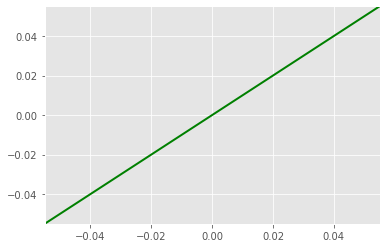

In [ ]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0, 0), 
           slope=1, 
           linewidth=2, color="green")


# Show the plot
plt.show()

In [ ]:
plt.style.use('ggplot')

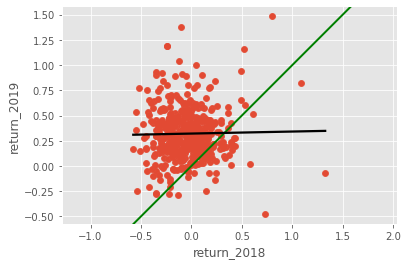

In [ ]:
sp500_yearly_returns = pd.read_csv('sp500_yearly_returns.csv')


# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(
    xy1=(0, 0), 
    slope=1, 
    linewidth=2, 
    color="green"
)

# Add scatter plot with linear regression trend line
sns.scatterplot(
    data=sp500_yearly_returns,
    x='return_2018', 
    y='return_2019'
)
sns.regplot(
    x='return_2018', 
    y='return_2019',
    data=sp500_yearly_returns,
    ci=None,
    line_kws={'color': 'black'}
)

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

## Model parameters

In [ ]:
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

### fitted values

In [ ]:
mdl_price_vs_conv.fittedvalues

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

### residuals

In [ ]:
mdl_price_vs_conv.resid

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

### summary table with all metrics

In [ ]:
mdl_price_vs_conv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.41e-37
Time:                        21:48:04   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.41e-37
Time:                        21:48:04   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

In [ ]:
mdl_price_vs_conv.params[0]

8.224237452790335

## Manually calculating predict

In [ ]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


In [ ]:
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


## Scatterplot and regplot of predictions

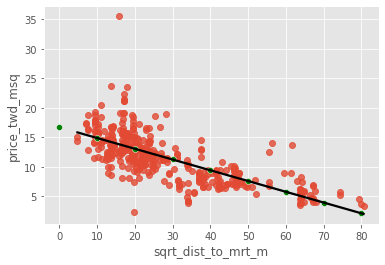

In [ ]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None, 
           line_kws={'color': 'black'})

# Add a layer of your prediction points
sns.scatterplot(
    data=prediction_data, 
    x='sqrt_dist_to_mrt_m', 
    y='price_twd_msq', 
    color='green')
plt.show()

---

When creating new data dataframe for regression - name of columns should be the same as on the scatter plot

---

In [ ]:
ad_conversion = pd.read_csv('ad_conversion.csv')
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


In [ ]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)   
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


/Users/ivan/.pyenv/versions/3.8.2/envs/py4data38/lib/python3.8/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)


In [ ]:
sum(mdl_click_vs_impression.resid ** 2)

36.2131730560354

In [ ]:
np.sqrt(sum(mdl_click_vs_impression.resid ** 2))

6.017738201021659

## Model quality metrics

### RSE - sum of residuals squared (aka Residual standard error)


typical difference between observed number and predicted number (in absolute values)

RSE can also be used for comparing models among each other in terms of accuracy of prediction


In [ ]:
residuals_sq = mdl_click_vs_impression.resid ** 2

resid_sum_of_sq = sum(residuals_sq)

deg_freedom = len(ad_conversion.index) - 2

rse = np.sqrt(resid_sum_of_sq/deg_freedom)

print("rse :", rse)


rse : 0.19690640896875736


### MSE - mean square error (RSE in 2 degree)

In [ ]:
mdl_click_vs_impression.mse_resid

0.038772133892971475

In [ ]:
rse ** 2

0.03877213389297153

In [ ]:
np.sqrt(mdl_click_vs_impression.mse_resid)

# equal to rse calculated above

0.19690640896875722

In [ ]:
resid_sum_of_sq/deg_freedom

0.03877213389297152

In [ ]:
mdl_click_vs_impression.mse_total

0.6981930499724337

### RMSE - Root mean square error

In [ ]:
residuals_sq = mdl_click_vs_impression.resid ** 2

resid_sum_of_sq = sum(residuals_sq)

n_obs = len(ad_conversion.index)

rmse = np.sqrt(resid_sum_of_sq / n_obs)

print('rmse :' , rmse)

rmse : 0.19669592637629604


### R - squared and correlation: 

In [ ]:
# qdrt_n_clicks ~ qdrt_n_impressions

ad_conversion['qdrt_n_clicks'].corr(ad_conversion['qdrt_n_impressions']) ** 2

0.9445272817143908

In [ ]:
mdl_click_vs_impression.rsquared

0.9445272817143905

In [ ]:
mdl_click_vs_impression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:48:05   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0.017      4.171      0.000       0.038       0.106
qdrt_n_impressions     0.1115      0.001    126.108      0.000       0.110       0.113
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.637
Skew:                          -0.216   Prob(JB):                      0.00490
Kurtosis:                       2.707   Cond. No.                         52.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Estimation of model quality (plots of residuals, q-q plots)

### Residuals VS Predicted ("fitted") values


In a good model, the residuals should have a trend line close to zero

In [ ]:
# sns.residplot(
#     x=
#     y=
#     data=
#     lowess=True
# )

In [ ]:
ad_conversion

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks
0,1.430000,7350,1,9.259165,1.000000
1,1.820000,17861,2,11.560495,1.189207
2,1.250000,4259,1,8.078429,1.000000
3,1.290000,4133,1,8.018006,1.000000
4,4.770000,15615,3,11.178551,1.316074
...,...,...,...,...,...
931,358.189997,1129773,252,32.602267,3.984283
932,173.880003,637549,120,28.257152,3.309751
933,40.289999,151531,28,19.729922,2.300327
934,198.710001,790253,135,29.815462,3.408658


<AxesSubplot: >

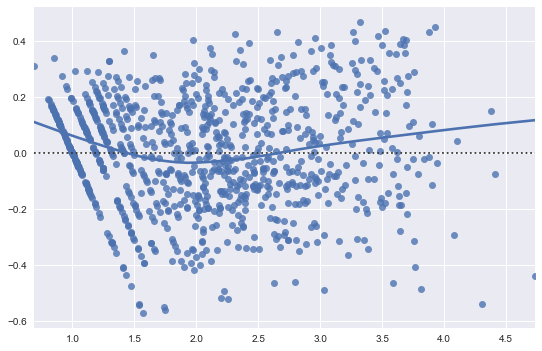

In [ ]:
sns.residplot(
    x=mdl_click_vs_impression.fittedvalues,
    y=mdl_click_vs_impression.resid,
    data=ad_conversion,
    lowess=True
)

Bad Case with low quality:

In [ ]:
# 
mdl_click_vs_impression_simple = ols("n_clicks ~ n_impressions", data=ad_conversion).fit()

<AxesSubplot: >

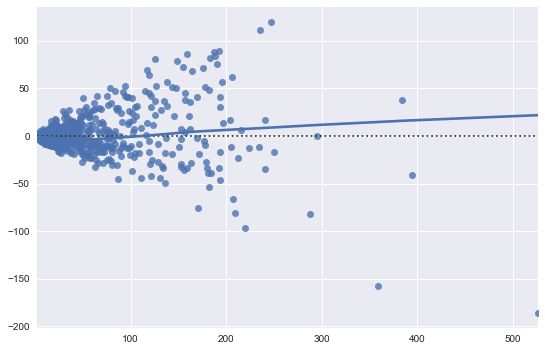

In [ ]:
sns.residplot(
    x='n_impressions',
    y='n_clicks',
    data=ad_conversion,
    lowess=True


### Q-Q Plot

If the residuals from the model are normally distributed, then the points will track the line on the Q-Q plot. In this case, neither model is perfect, but the transformed model is closer.

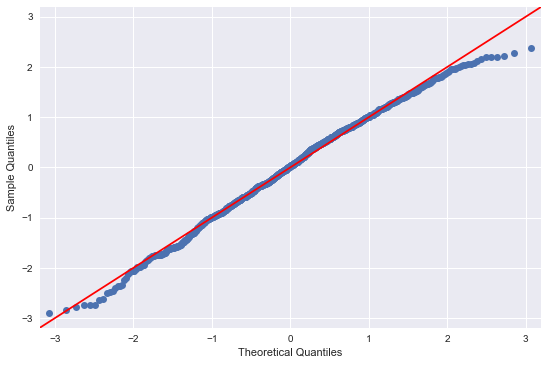

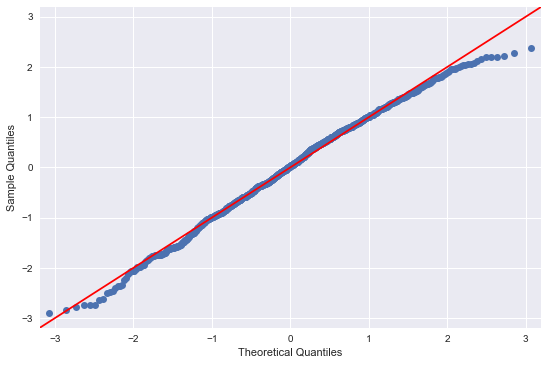

In [ ]:
from statsmodels.api import qqplot

qqplot(
    data=mdl_click_vs_impression.resid, 
    fit=True,
    line='45'
)

Bad Case with low quality:

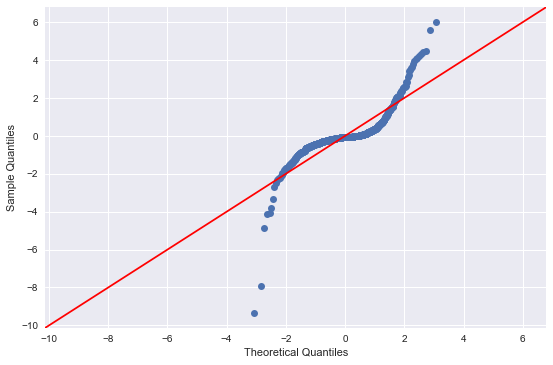

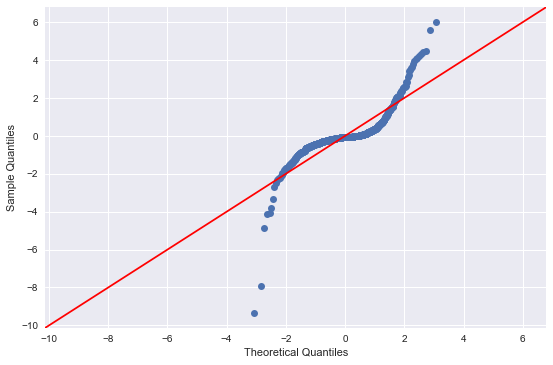

In [ ]:
qqplot(
    data=mdl_click_vs_impression_simple.resid, 
    fit=True,
    line='45'
)

### Scale-Location Plot:  Standartized ("studentized") residuals VS Predicted ("fitted" values)

In a good model, the size of the residuals shouldn't change much as the fitted values change.

In [ ]:

# get resid_studentized for Y axis
# model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized_internal
# model_norm_residuals_abs_sqrt_bream = np.sqrt(np.abs(model_norm_residuals_bream))


# sns.regplot(
#     x=mdl_bream.fittedvalues, # from model object directly
#     y=model_norm_residuals_abs_sqrt_bream, # calculated above
#     ci=None, 
#     lowess=True
# )
# plt.xlabel("Fitted values")
# plt.ylabel("Sqrt of abs val of stdized residuals")

In [ ]:
plt.style.use('seaborn')

/var/folders/2g/vm02gnkd7nd3lzt5qcby6t7r0000gn/T/ipykernel_768/1844467949.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Sqrt of abs val of stdized residuals')

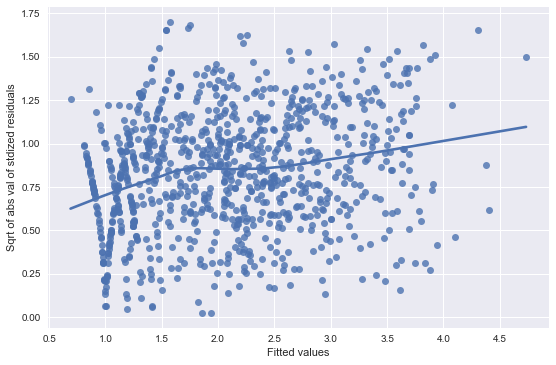

In [ ]:

# get resid_studentized for Y axis
model_norm_residuals = mdl_click_vs_impression.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))


sns.regplot(
    x=mdl_click_vs_impression.fittedvalues, # from model object directly
    y=model_norm_residuals_abs_sqrt, # calculated above
    ci=None, 
    lowess=True
)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

Bad Case with low quality:

Text(0, 0.5, 'Sqrt of abs val of stdized residuals')

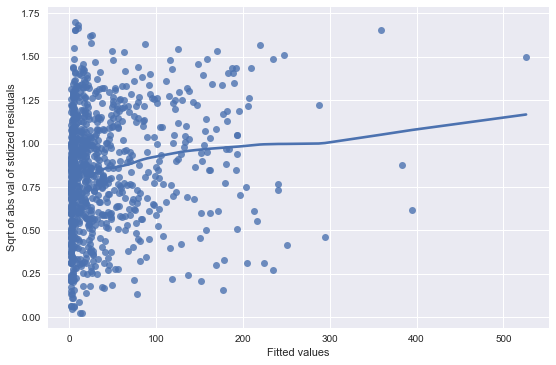

In [ ]:

# get resid_studentized for Y axis
model_norm_residuals_simple = mdl_click_vs_impression_simple.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_simple = np.sqrt(np.abs(model_norm_residuals))


sns.regplot(
    x=mdl_click_vs_impression_simple.fittedvalues, # from model object directly
    y=model_norm_residuals_abs_sqrt_simple, # calculated above
    ci=None, 
    lowess=True
)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

## Outliers estimation

Leverage - measure how extreme the explanatory variables are


Influence - how much the model would change if you left the observation out of the dataset 

Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

### Cooks's distance


In [ ]:
# 
summary_model = mdl_click_vs_impression.get_influence().summary_frame()
print(len(summary_model))
print(len(ad_conversion))

summary_model.head()

936
936


,dfb_Intercept,dfb_qdrt_n_impressions,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.025941,0.020961,3.709625e-04,-0.531155,0.002623,-0.027238,-0.530951,-0.027228
1,-0.034293,0.025444,7.325553e-04,-0.873931,0.001915,-0.038277,-0.873821,-0.038272
2,0.007449,-0.006204,2.955100e-05,0.138555,0.003069,0.007688,0.138482,0.007684
3,0.009336,-0.007786,4.634846e-05,0.172835,0.003094,0.009628,0.172745,0.009623
4,-0.000509,0.000384,1.569864e-07,-0.012463,0.002017,-0.000560,-0.012456,-0.000560


In [ ]:
# leverage is in 'hat_diag'
ad_conversion['leverage'] = summary_model['hat_diag']
ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks,leverage,cooks_d
0,1.43,7350,1,9.259165,1.000000,0.002623,0.000007
1,1.82,17861,2,11.560495,1.189207,0.001915,0.000014
2,1.25,4259,1,8.078429,1.000000,0.003069,0.000004
3,1.29,4133,1,8.018006,1.000000,0.003094,0.000004
4,4.77,15615,3,11.178551,1.316074,0.002017,0.000004


In [ ]:
# Cook`s distance
ad_conversion['cooks_d'] = summary_model['cooks_d']
ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks,leverage,cooks_d
0,1.43,7350,1,9.259165,1.000000,0.002623,3.709625e-04
1,1.82,17861,2,11.560495,1.189207,0.001915,7.325553e-04
2,1.25,4259,1,8.078429,1.000000,0.003069,2.955100e-05
3,1.29,4133,1,8.018006,1.000000,0.003094,4.634846e-05
4,4.77,15615,3,11.178551,1.316074,0.002017,1.569864e-07


In [ ]:
ad_conversion \
    .sort_values('cooks_d', ascending=False) \
    .head(10)

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks,leverage,cooks_d
332,360.150001,2080666,202,37.979618,3.769970,0.009092,0.034532
329,639.949998,3052003,340,41.797109,4.294076,0.012458,0.031810
328,236.769999,1267550,123,33.553766,3.330246,0.005926,0.018105
819,541.700002,1428421,367,34.571168,4.376899,0.006584,0.017369
788,465.079998,1358324,346,34.139004,4.312896,0.006299,0.015461
335,163.899997,984521,95,31.499688,3.121986,0.004725,0.013187
428,236.119999,1206533,128,33.142465,3.363586,0.005672,0.012113
834,402.300003,1111156,282,32.467119,4.097909,0.005269,0.011264
762,390.259999,1083259,276,32.261390,4.075935,0.005150,0.011060
763,340.409999,913929,245,30.919190,3.956321,0.004416,0.010926


Look at the scatterplot with data original to find outliers:

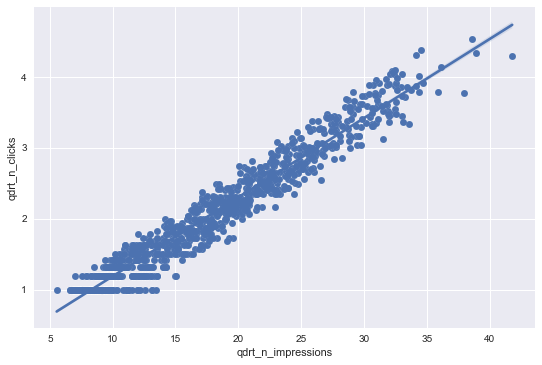

In [ ]:
fig = plt.figure()

sns.scatterplot(
    data=ad_conversion, 
    x='qdrt_n_impressions',
    y='qdrt_n_clicks'
)

sns.regplot(
    data=ad_conversion,
    x='qdrt_n_impressions',
    y='qdrt_n_clicks',
)

plt.show()

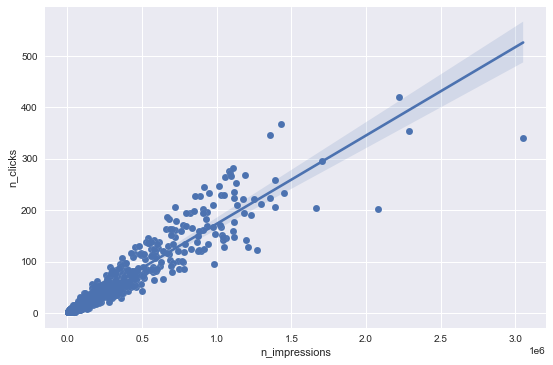

In [ ]:
fig = plt.figure()

sns.scatterplot(
    data=ad_conversion, 
    x='n_impressions',
    y='n_clicks'
)

sns.regplot(
    data=ad_conversion,
    x='n_impressions',
    y='n_clicks',
)

plt.show()

In [ ]:
summary_model_simple = mdl_click_vs_impression_simple.get_influence().summary_frame()

ad_conversion['leverage_simple'] = summary_model_simple['hat_diag']
ad_conversion['cooks_d'] = summary_model_simple['cooks_d']

ad_conversion_trimmed = ad_conversion[ad_conversion['n_impressions'] < 1_500_000]

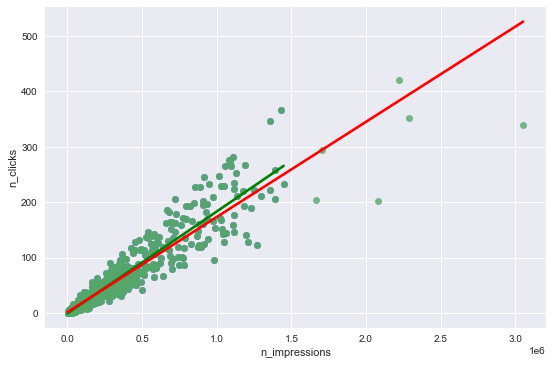

In [ ]:
fig = plt.figure()

sns.regplot(
    data=ad_conversion_trimmed,
    x='n_impressions',
    y='n_clicks',
    ci=None,
    line_kws={'color': 'green'}
)

sns.regplot(
    data=ad_conversion,
    x='n_impressions',
    y='n_clicks',
    ci=None,
    line_kws={'color': 'red'}
)

plt.show()

## Logistic Regression

In [ ]:
from statsmodels.formula.api import logit

In [ ]:
churn = pd.read_csv('churn.csv')
churn.head(3)

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582


### Drawing a logistic regression on a scatter plot

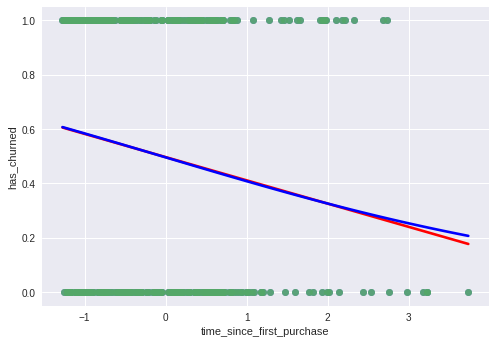

In [ ]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned

sns.regplot(
    x='time_since_first_purchase',
    y='has_churned',
    data=churn,
    ci=None,
    logistic=True,
    line_kws={'color':'blue'}
)

plt.show()

In [ ]:
# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit(
    'has_churned ~ time_since_first_purchase', 
    data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


In [ ]:
explanatory_data = pd.DataFrame(
    {
        "time_since_first_purchase": np.arange(-1, 6.25, 0.25)
    }
)
explanatory_data.head(3)

,time_since_first_purchase
0,-1.00
1,-0.75
2,-0.50


In [ ]:
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)
prediction_data.head(3)

,time_since_first_purchase,has_churned
0,-1.00,0.584096
1,-0.75,0.562401
2,-0.50,0.540465


### Plotting predicted values

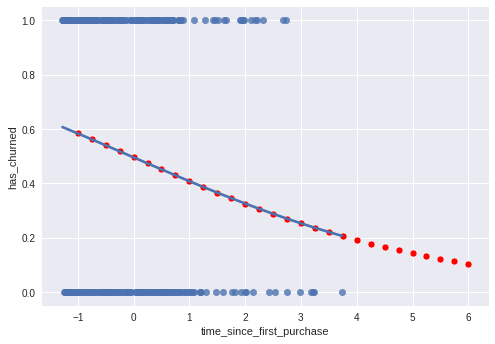

In [ ]:
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

sns.scatterplot(x="time_since_first_purchase",
                y="has_churned",
                data=prediction_data,
                color="red")
plt.show() 


### Rounding predicted values to 0 or 1

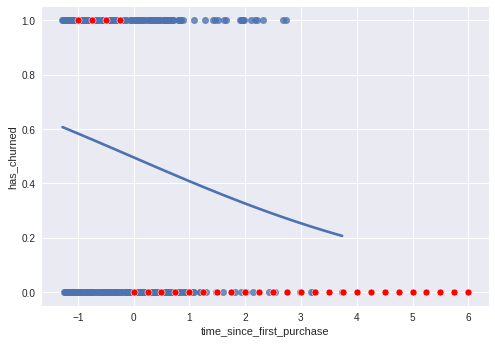

In [ ]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red

sns.scatterplot(
    data=prediction_data,
    color='red',
    x='time_since_first_purchase', 
    y='most_likely_outcome',
)

plt.show()

### Odds ratio

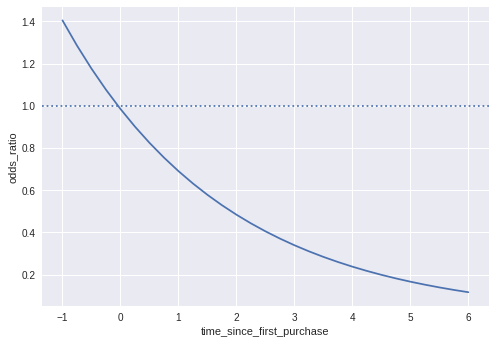

In [ ]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(
    data=prediction_data, 
    x='time_since_first_purchase', 
    y='odds_ratio'
)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()


# Odds ratios provide an alternative to probabilities that make 
# it easier to compare positive and negative responses.

### Log of odds ratio

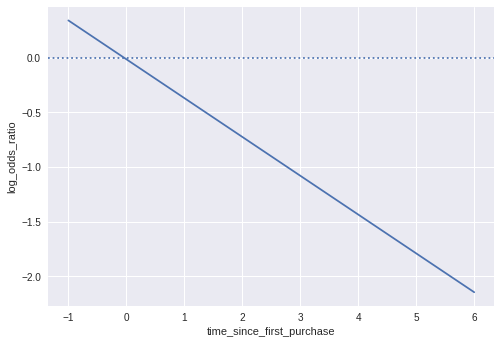

In [ ]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

## Confusion matrix

In [ ]:
#               |   predicted false                              |   predicted true
#               |                                                |
# actual false  |   correct (true negative TN)                   |   false positive (FP)
# actual true   |   false negative (FN)                          |   correct (true positive TP)
# 
# 
# PATTERN ______ _______
# (prediction type: false or true of prediction (correct or not)) (what was predicted: false ie negative Or true ie positive)
# 

Sensitivity = TP / (TP + FN)

Specifity = TN / (TN + FP)

In [ ]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict(
    churn['time_since_first_purchase']
))


# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({'actual_response': actual_response,
                         'predicted_response': predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

[[112.  88.]
 [ 76. 124.]]


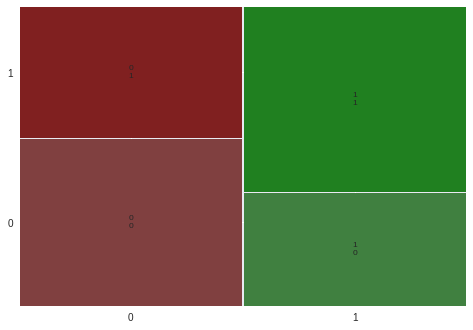

In [ ]:
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()